In [1]:
# from sklearn.datasets import fetch_openml
import pickle
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


with open('/home/dmytro/Desktop/hands_on_ml/classification_p121/mnist.pickle', 'rb') as f:
    mnist = pickle.load(f)

# Prepare data
X = mnist['data']
y = mnist['target'].astype('int')

X_train = X[:20000]
X_test = X[20000:22000]

y_train = y[:20000]
y_test = y[20000:22000]

# y_train_5 = (y_train == 5)
# y_test_5 = (y_test == 5)

# y_train_5 = y_train_5.astype('int')
# y_test_5 = y_test_5.astype('int')



In [2]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)


SVC()

In [3]:
# some_digit_scores = svm_clf.decision_function([some_digit])

sv.score(X_test, y_test)

# If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest,
# you can use the OneVsOneClassifier or OneVsRestClassifier classes.
# Simply create an instance and pass a classifier to its constructor (it does not even
# have to be a binary classifier).

# fit -> cross_val_score -> Standart scale



0.9675

In [4]:
#Error Analysis

# First, look at the confusion matrix. You need to make predictions using the
# cross_val_predict() function, then call the confusion_matrix() function,
# just like you did earlier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

y_train_pred = cross_val_predict(sv, X_train_scaled, y_train, cv=3)

array([[1958,    0,   14,    4,    3,    3,    6,    3,    2,    1],
       [   0, 2241,   12,    4,    2,    1,    2,    7,    9,    3],
       [   9,    9, 1815,   15,   12,    3,   15,   28,   21,    2],
       [   0,   11,   50, 1910,    5,   25,    2,   41,   22,   10],
       [   2,    5,   26,    0, 1842,    4,   12,   10,    1,   43],
       [  10,    6,   13,   39,    3, 1650,   24,   12,   12,    6],
       [  10,    4,   37,    0,    8,   15, 1879,   14,    4,    0],
       [   3,    6,   28,    5,   16,    0,    0, 1990,    5,   40],
       [   9,   19,   25,   28,   11,   30,   16,   11, 1758,   15],
       [   5,    3,   17,   16,   34,    6,    1,   58,   16, 1858]])

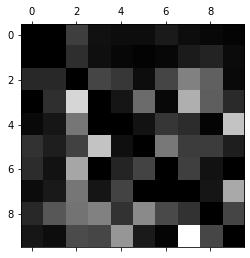

In [6]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()
conf_mx


In [14]:
# Analyzing the confusion matrix often gives you insights into ways to improve
# your classifier. Looking at this plot, it seems that your efforts should be spent on
# reducing the false 2s. For example, you could try to gather more training data for
# digits that look like 2s (but are not) so that the classifier can learn to distinguish
# them from real 2s. Or you could engineer new features that would help the
# classifier—for example, writing an algorithm to count the number of closed
# loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the
# images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns,
# such as closed loops, stand out more.

In [9]:
#                  Multilabel classification

# We won’t go into face recognition just yet, but let’s look at a simpler example,
# just for illustration purposes:

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)



KNeighborsClassifier()

In [39]:
# There are many ways to evaluate a multilabel classifier, and selecting the right
# metric really depends on your project. One approach is to measure the F  score
# for each individual label (or any other binary classifier metric discussed earlier),
# then simply compute the average score. This code computes the average F  score
# across all labels:

from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

# This assumes that all labels are equally important, however, which may not be
# the case. In particular, if you have many more pictures of Alice than of Bob or
# Charlie, you may want to give more weight to the classifier’s score on pictures
# of Alice. One simple option is to give each label a weight equal to its support
# (i.e., the number of instances with that target label). To do this, simply set
# average="weighted" in the preceding code.

0.9654238425909302

/home/dmytro/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


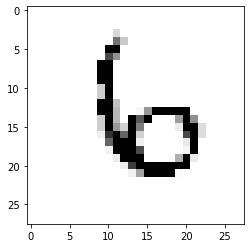

In [66]:
# Multioutput classification

# To illustrate this, let’s build a system that removes noise from images.

# Let’s start by creating the training and test sets by taking the MNIST images and
# adding noise to their pixel intensities with NumPy’s randint() function. The
# target images will be the original images

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


dig1 = np.array(X_test_mod.iloc[5]).reshape(28,28)


knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[5]])
dig = np.array(clean_digit).reshape(28,28)
plt.imshow(dig, cmap='binary')

In [ ]:
# Looks close enough to the target! This concludes our tour of classification. You
# should now know how to select good metrics for classification tasks, pick the
# appropriate precision/recall trade-off, compare classifiers, and more generally
# build good classification systems for a variety of tasks